created on base of 

# 1. Get an overview of the dataset

In [ ]:
import pandas as pd

train_data = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv")

In [2]:
train_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [3]:
test_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [4]:
train_data.shape

(300000, 11)

In [5]:
test_data.shape

(200000, 10)

In [6]:
train_missing_values = pd.DataFrame({"feature" : train_data.columns, 
                                     "missing values": train_data.isnull().sum().values,
                                     "percentage of missing values (%)": train_data.isnull().sum().values/ len(train_data)*100 })
train_missing_values

,feature,missing values,percentage of missing values (%)
0,id,0,0.000000
1,Brand,9705,3.235000
2,Material,8347,2.782333
3,Size,6595,2.198333
4,Compartments,0,0.000000
5,Laptop Compartment,7444,2.481333
6,Waterproof,7050,2.350000
7,Style,7970,2.656667
8,Color,9950,3.316667
9,Weight Capacity (kg),138,0.046000


In [7]:
test_missing_values = pd.DataFrame({"feature" : train_data.columns, 
                                     "missing values": train_data.isnull().sum().values,
                                     "percentage of missing values (%)": train_data.isnull().sum().values/ len(train_data)*100 })
test_missing_values

,feature,missing values,percentage of missing values (%)
0,id,0,0.000000
1,Brand,9705,3.235000
2,Material,8347,2.782333
3,Size,6595,2.198333
4,Compartments,0,0.000000
5,Laptop Compartment,7444,2.481333
6,Waterproof,7050,2.350000
7,Style,7970,2.656667
8,Color,9950,3.316667
9,Weight Capacity (kg),138,0.046000


In [8]:
train_unique_values = pd.DataFrame({'feature': train_data.columns,
                              'no. of unique values': train_data.nunique().values})
train_unique_values

,feature,no. of unique values
0,id,300000
1,Brand,5
2,Material,4
3,Size,3
4,Compartments,10
5,Laptop Compartment,2
6,Waterproof,2
7,Style,3
8,Color,6
9,Weight Capacity (kg),181596


In [9]:
train_feature_types = pd.DataFrame({'feature': train_data.columns,
                              'dataType': train_data.dtypes})

train_feature_types

,feature,dataType
id,id,int64
Brand,Brand,object
Material,Material,object
Size,Size,object
Compartments,Compartments,float64
Laptop Compartment,Laptop Compartment,object
Waterproof,Waterproof,object
Style,Style,object
Color,Color,object
Weight Capacity (kg),Weight Capacity (kg),float64


In [10]:
train_data.duplicated().sum()

0

In [11]:
test_data.duplicated().sum()

0

In [12]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,149999.500000,86602.684716,0.0,74999.750000,149999.500000,224999.250000,299999.0
Compartments,300000.0,5.443590,2.890766,1.0,3.000000,5.000000,8.000000,10.0
Weight Capacity (kg),299862.0,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0
Price,300000.0,81.411107,39.039340,15.0,47.384620,80.956120,115.018160,150.0


## Summary

**Training Data**: 

> 300 000 rows x 11 columns

**Test Data**:

> 200 000 rows x 10 columns (no price column)


**Missing values**: 

|   | Attribute             | % missing values (Train)  | % missing values (Test)|
|---|-----------------------|---------------------------|------------------------|
| 1 | Brand                 | 3.235000                  | 3.235000 |
| 2 | Material              | 2.782333                  | 2.782333 |
| 3 | Size                  | 2.198333                  | 2.198333|
| 4 | Compartments          | 0.000000                  | 0.000000|
| 5 | Laptop Compartment    | 2.481333                  | 2.481333|
| 6 | Waterproof            | 2.350000                  |2.350000 |
| 7 | Style                 | 2.656667                  | 2.656667|
| 8 | Color                 | 3.316667                  | 3.316667|
| 9 | Weight Capacity (kg)  | 0.046000                  | 0.046000|


--> Missing values must be handled !


**Features with wide distribution**:

> Weight Capacity: Mean 18, Min 5, Max 30

> Price: Mean 81, Min 15, max 150

--> Feature scaling may be needed

**Feature types**: 
- Numerical values
- Categorical values
    
--> Requires different handling of missing entries


# Exploratory Data Analysis

## Numerical Feature analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'Dataset' column to distinguish between train and test data
train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'


<Axes: xlabel='Weight Capacity (kg)', ylabel='Dataset'>

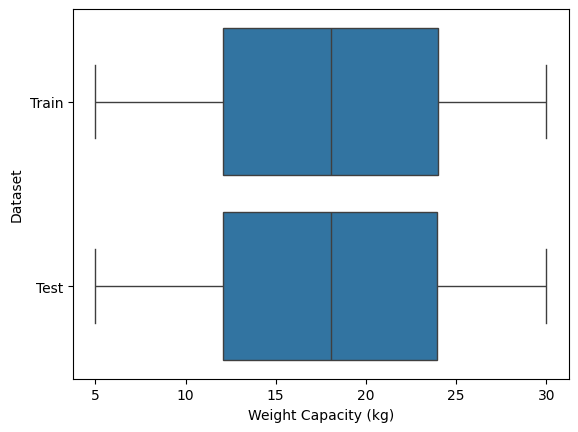

In [14]:
column = "Weight Capacity (kg)"
data_concat = pd.concat([train_data, test_data],ignore_index=True)


sns.boxplot(data=data_concat, x=column, y='Dataset')


<Axes: xlabel='Weight Capacity (kg)', ylabel='Count'>

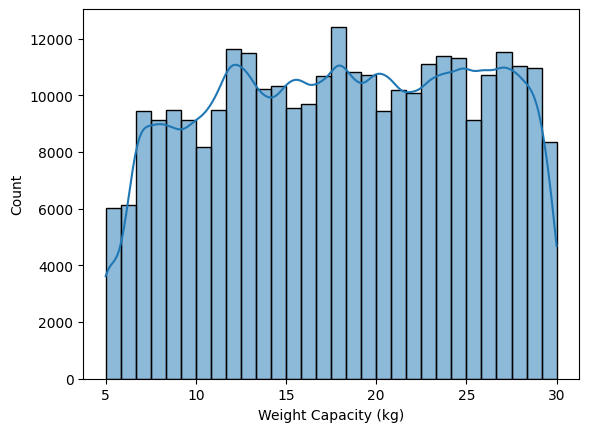

In [15]:
sns.histplot(data=train_data, x=column, kde=True, bins=30, label="Train")


<Axes: xlabel='Weight Capacity (kg)', ylabel='Count'>

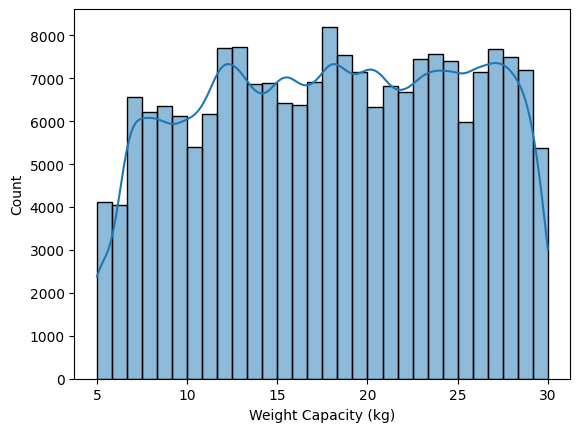

In [16]:
sns.histplot(data=test_data, x=column, kde=True, bins=30, label="Test")

In [17]:
train_data.drop('Dataset', axis=1, inplace=True)
test_data.drop('Dataset', axis=1, inplace=True)

## Categorical Feature Analysis

In [18]:
categorical_variables = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment','Waterproof', 'Style', 'Color']
pie_chart_palette = ['#33638d', '#28ae80', '#d3eb0c', '#ff9a0b', '#7e03a8', '#35b779', '#fde725', '#440154', '#90d743', '#482173', '#22a884', '#f8961e']

countplot_color = '#5C67A3'


In [19]:
def create_categorical_plots(variable):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Pie Chart TRAIN
    plt.subplot(1, 3, 1)
    train_data[variable].value_counts().plot.pie(
        autopct='%1.1f%%', colors=pie_chart_palette, wedgeprops=dict(width=0.3), startangle=140
    )
    plt.title(f"Pie Chart for {variable} [TRAIN]")

    # Pie Chart TEST
    plt.subplot(1, 3, 2)
    test_data[variable].value_counts().plot.pie(
        autopct='%1.1f%%', colors=pie_chart_palette, wedgeprops=dict(width=0.3), startangle=140
    )
    plt.title(f"Pie Chart for {variable} [TEST]")

    # Bar Graph
    plt.subplot(1, 3, 3)
    sns.countplot(
        data=pd.concat([train_data, test_data],ignore_index=True), 
        x=variable, 
        color=countplot_color,  # Using a single color for the countplot
        alpha=0.8  # Setting 80% opacity
    )
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title(f"Bar Graph for {variable} [TRAIN, TEST Combined]")

    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the plots
    plt.show()

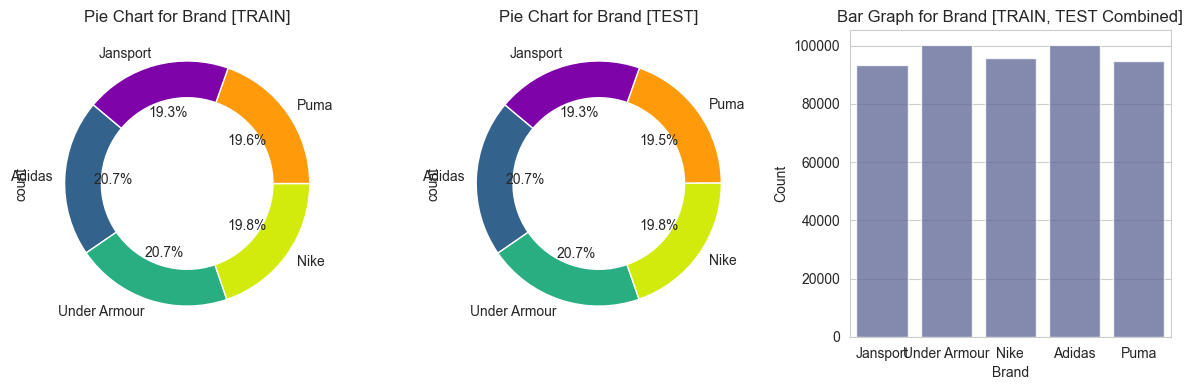

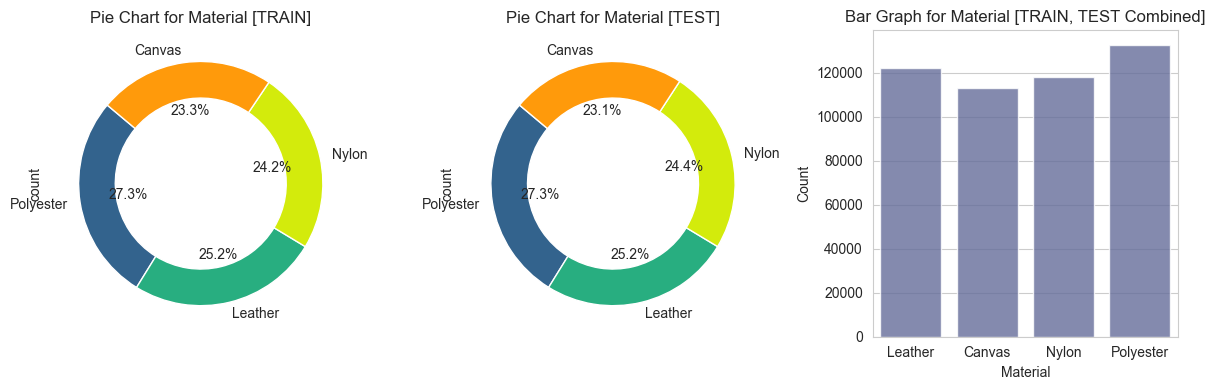

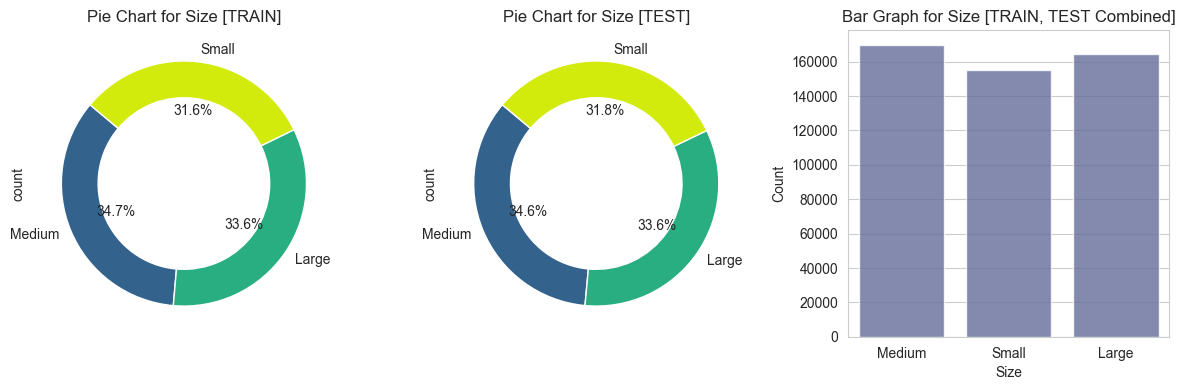

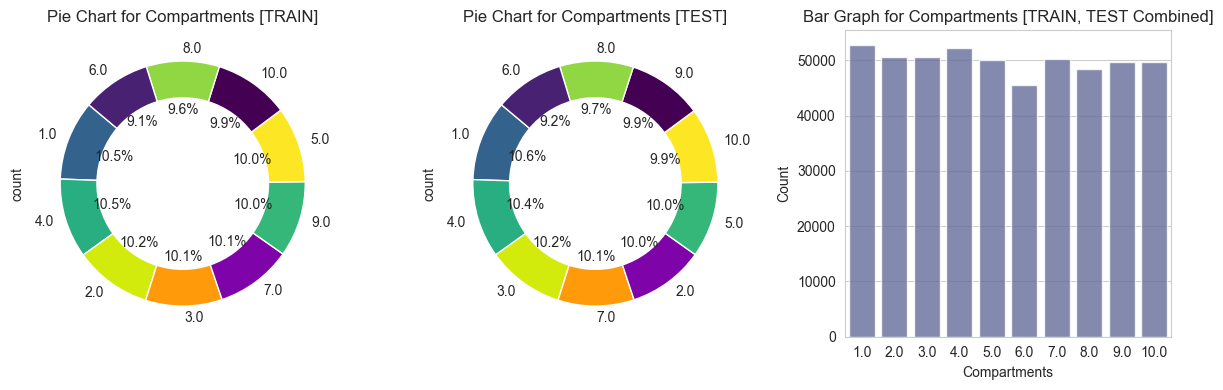

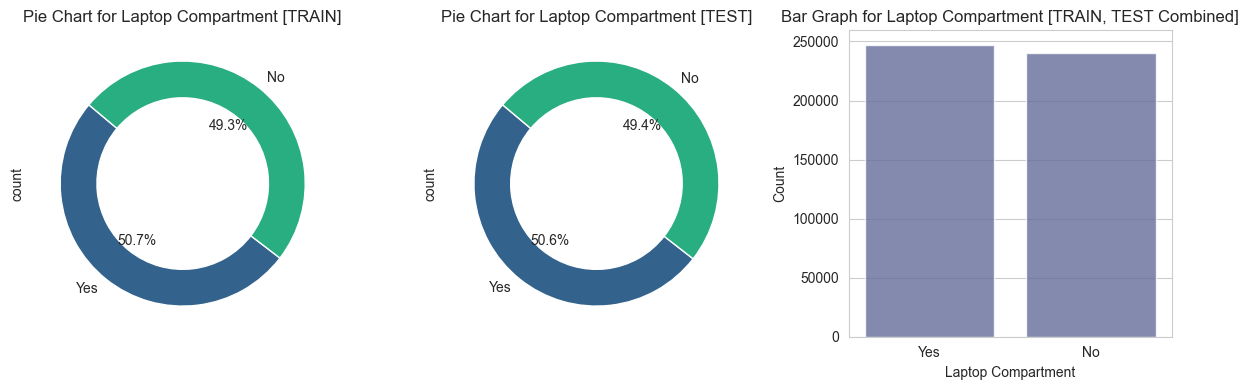

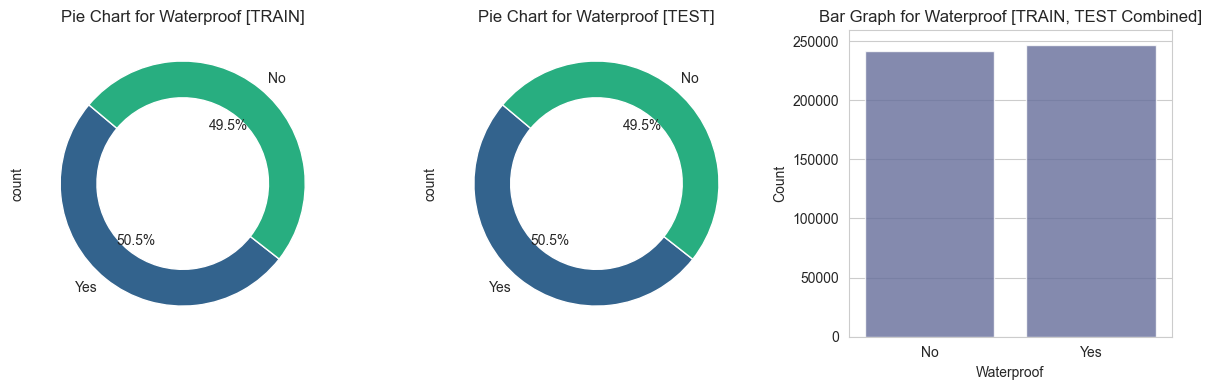

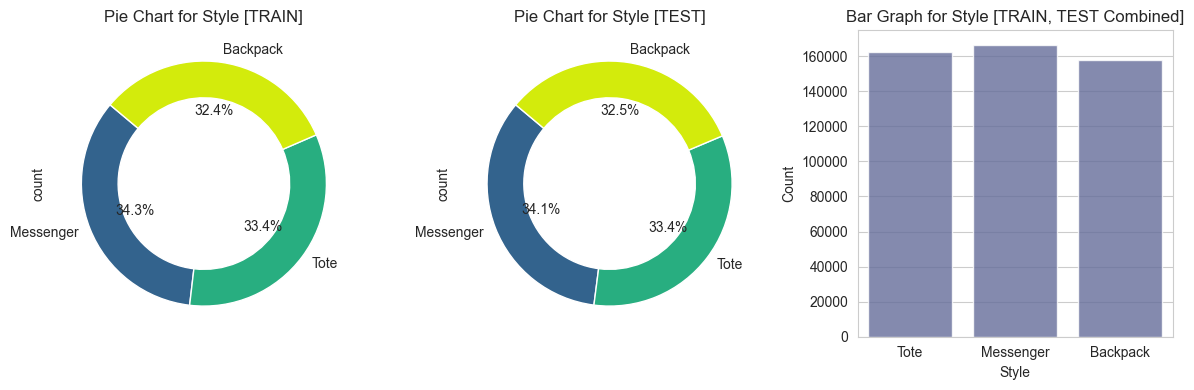

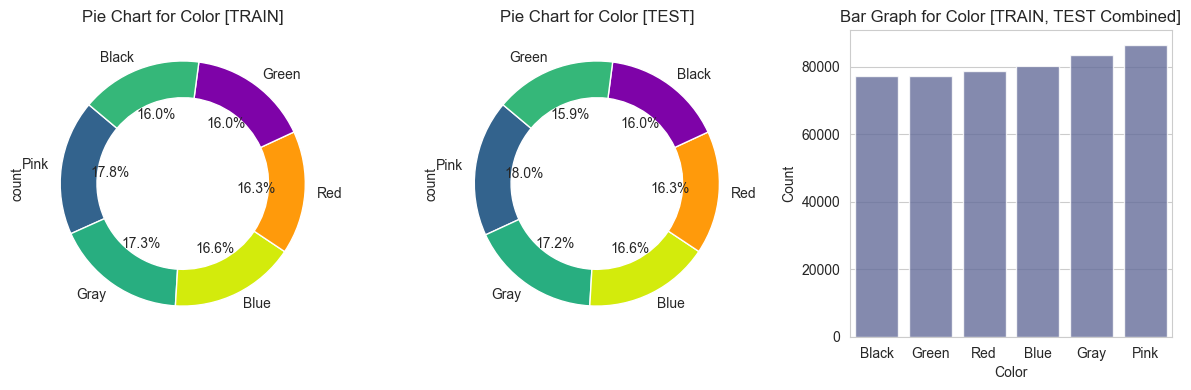

In [20]:
for variable in categorical_variables:
    create_categorical_plots(variable)

## Target Feature analysis

In [21]:
target_palette = ['#3498db', '#e74c3c']

train_data['Dataset'] = 'Train'


C:\Users\engconstanti\AppData\Local\Temp\ipykernel_5552\2787130357.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x=target_variable, y="Dataset", palette=target_palette)
C:\Users\engconstanti\AppData\Local\Temp\ipykernel_5552\2787130357.py:8: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=train_data, x=target_variable, y="Dataset", palette=target_palette)


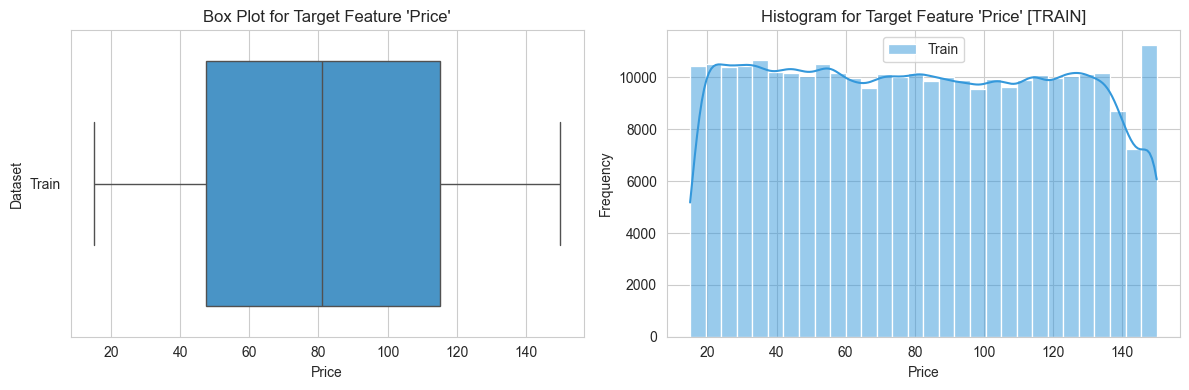

In [22]:
sns.set_style('whitegrid')
    
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
target_variable = "Price"

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(data=train_data, x=target_variable, y="Dataset", palette=target_palette)
plt.xlabel(target_variable)
plt.title(f"Box Plot for Target Feature '{target_variable}'")

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=train_data, x=target_variable, color=target_palette[0], kde=True, bins=30, label="Train")
plt.xlabel(target_variable)
plt.ylabel("Frequency")
plt.title(f"Histogram for Target Feature '{target_variable}' [TRAIN]")
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [23]:
train_data.drop('Dataset', axis=1, inplace=True)

## Bivariate Analysis

<Axes: >

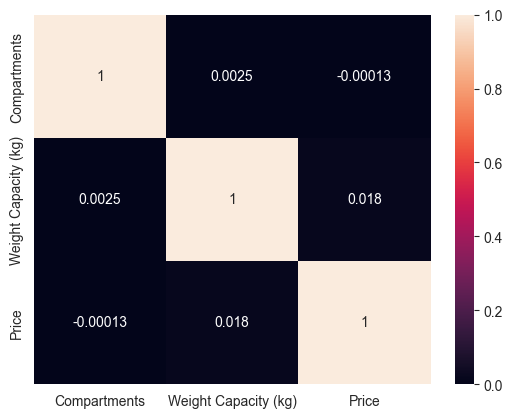

In [24]:
import numpy as np

numerical_variables = ['Compartments','Weight Capacity (kg)', 'Price']

sns.heatmap(train_data[numerical_variables].corr(), annot=True)


-> No correlation between numerical features

# Data Preprocessing

## Handle missing values

In [25]:
categorical_features = ["Brand", "Material", "Size", "Laptop Compartment", "Waterproof", "Style", "Color"]

# Fill categorical missing values with mode (most frequent value)
for col in categorical_features:
    train_data.fillna({col : train_data[col].mode()[0]}, inplace=True)
    test_data.fillna({col : test_data[col].mode()[0]}, inplace=True)

In [26]:
numerical_features = ["Weight Capacity (kg)"]

# Fill numerical missing values with median
for col in numerical_features:
    train_data.fillna({col : train_data[col].median()}, inplace=True)
    test_data.fillna({col : test_data[col].median()}, inplace=True)

## Feature engineering

In [27]:
def perform_feature_engineering(df):
    # Brand Material Interaction - Certain materials may be common for specific brands
    df['Brand_Material'] = df['Brand'] + '_' + df['Material']

    # Brand & Size Interaction - Some brands may produce only specific sizes
    df['Brand_Size'] = df['Brand'] + '_' + df['Size']

    # Compartments Binning - Group compartments into categories
    df['Compartments_Category'] = pd.cut(df['Compartments'], bins=[0, 2, 5, 10, np.inf], labels=['Few', 'Moderate', 'Many', 'Very Many'])

    # Weight Capacity Ratio - Normalize weight capacity using the max value
    df['Weight_Capacity_Ratio'] = df['Weight Capacity (kg)'] / df['Weight Capacity (kg)'].max()

    # Interaction Feature: Weight vs. Compartments - Some bags may hold more with less compartments
    df['Weight_to_Compartments'] = df['Weight Capacity (kg)'] / (df['Compartments'] + 1)  # Avoid division by zero

    # Style and Size Interaction - Certain styles may correlate with sizes
    df['Style_Size'] = df['Style'] + '_' + df['Size']

    return df


In [28]:
train_data = perform_feature_engineering(train_data)
test_data = perform_feature_engineering(test_data)

train_data = train_data.drop("id", axis=1)
test_data_ids = test_data["id"]
test_data = test_data.drop("id", axis=1)    

## Handling outliers

1. **Find Q1 (10th percentile) and Q3 (90th percentile)** → These define the middle range of the data.
2. **Calculate the Interquartile Range (IQR)**:  
   IQR = Q3 - Q1
3. **Define Lower and Upper Boundaries**:  
   Lower Bound = Q1 - 1.5 * IQR
   Upper Bound = Q3 + 1.5 * IQR
5. **Anything outside these bounds is considered an outlier!** 🚨

In [29]:
features_for_iqr = ['Weight Capacity (kg)','Weight_Capacity_Ratio','Weight_to_Compartments']

In [30]:
    Q1 = train_data["Weight Capacity (kg)"].quantile(0.1)
    Q3 = train_data["Weight Capacity (kg)"].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [31]:
print(Q1)
print(Q3)
print(IQR)
print(lower_bound)
print(upper_bound)

8.244940577960653
27.543242268213294
19.298301690252643
-20.70251195741831
56.49069480359226


In [32]:
def remove_outliers_iqr_with_plot(data, column):
    Q1 = data[column].quantile(0.1)
    Q3 = data[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    # Calculate the number of rows deleted
    rows_deleted = len(data) - len(filtered_data)
    
    # Plot the distribution with outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column], color='lightblue', flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'})
    
    # Highlight Q1 and Q3
    plt.axvline(Q1, color='green', linestyle='--', label='Q1 (10th Percentile)')
    plt.axvline(Q3, color='blue', linestyle='--', label='Q3 (90th Percentile)')
    
    # Highlight lower and upper bounds
    plt.axvline(lower_bound, color='red', linestyle='-', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='-', label='Upper Bound')

    plt.title(f'Outlier Detection for {column}')
    plt.legend()
    plt.xlabel(column)
    plt.show()
    
    return filtered_data, rows_deleted



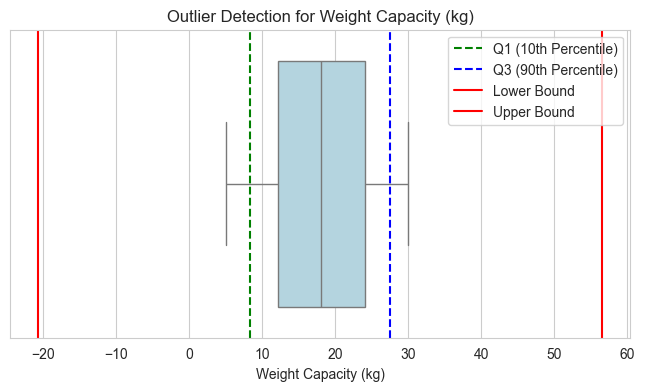

Rows deleted for Weight Capacity (kg): 0


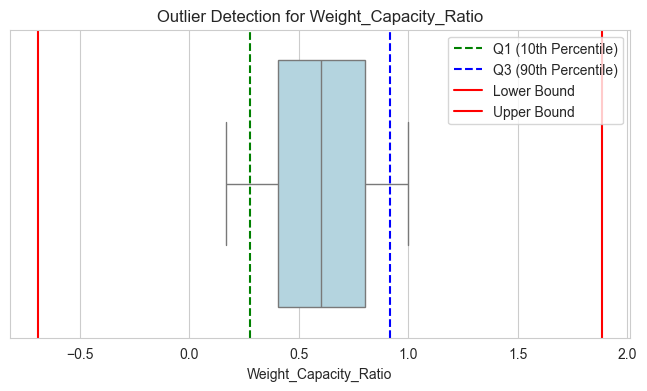

Rows deleted for Weight_Capacity_Ratio: 0


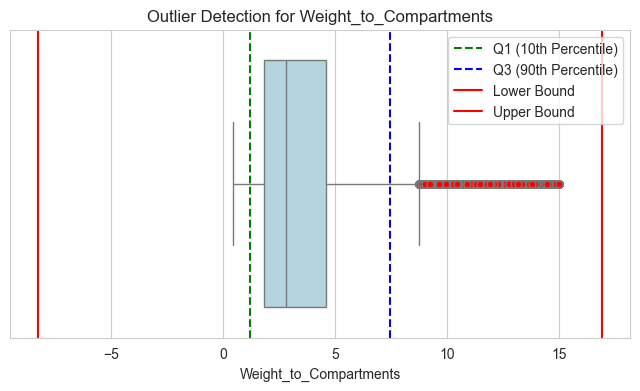

Rows deleted for Weight_to_Compartments: 0
Total rows deleted: 0


In [33]:
rows_deleted_total = 0
for column in features_for_iqr:
    train_data, rows_deleted = remove_outliers_iqr_with_plot(train_data, column)
    rows_deleted_total += rows_deleted
    print(f"Rows deleted for {column}: {rows_deleted}")

print(f"Total rows deleted: {rows_deleted_total}")

---> No outliers

## Transformation of Distributions

In [34]:
train_data.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,Brand_Material,Brand_Size,Compartments_Category,Weight_Capacity_Ratio,Weight_to_Compartments,Style_Size
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,Jansport_Leather,Jansport_Medium,Many,0.387057,1.451465,Tote_Medium
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,Jansport_Canvas,Jansport_Small,Many,0.902618,2.461685,Messenger_Small
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,Under Armour_Leather,Under Armour_Small,Few,0.554792,5.547920,Messenger_Small
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,Nike_Nylon,Nike_Small,Many,0.431241,1.437469,Messenger_Small
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,Adidas_Canvas,Adidas_Medium,Few,0.591645,8.874669,Messenger_Medium


In [35]:
numerical_variables = ['Weight Capacity (kg)']


# [FOR TRAIN]
# Identify features with skewness greater than 0.75
skewed_features = train_data[numerical_variables].skew()[train_data[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75):")
display(skewed_features)

Features to be transformed (skewness > 0.75):


array([], dtype=object)

In [36]:
# [FOR TEST]
# Identify features with skewness greater than 0.75
skewed_features = test_data[numerical_variables].skew()[test_data[numerical_variables].skew() > 0.75].index.values

# Print the list of variables to be transformed
print("Features to be transformed (skewness > 0.75):")
display(skewed_features)

Features to be transformed (skewness > 0.75):


array([], dtype=object)

## Feature Encoding

In [37]:
# Selecting specific columns for encoding
columns_to_encode = ['Brand', 'Material', 'Size', 'Laptop Compartment','Waterproof', 'Style', 'Color','Brand_Material', 'Brand_Size', 'Compartments_Category', 'Style_Size']
train_data_to_encode = train_data[columns_to_encode]
test_data_to_encode = test_data[columns_to_encode]

train_data_encoded = pd.get_dummies(train_data_to_encode, columns=columns_to_encode, drop_first=True)
test_data_encoded = pd.get_dummies(test_data_to_encode, columns=columns_to_encode, drop_first=True)

In [38]:
train_data_encoded.columns

Index(['Brand_Jansport', 'Brand_Nike', 'Brand_Puma', 'Brand_Under Armour',
       'Material_Leather', 'Material_Nylon', 'Material_Polyester',
       'Size_Medium', 'Size_Small', 'Laptop Compartment_Yes', 'Waterproof_Yes',
       'Style_Messenger', 'Style_Tote', 'Color_Blue', 'Color_Gray',
       'Color_Green', 'Color_Pink', 'Color_Red',
       'Brand_Material_Adidas_Leather', 'Brand_Material_Adidas_Nylon',
       'Brand_Material_Adidas_Polyester', 'Brand_Material_Jansport_Canvas',
       'Brand_Material_Jansport_Leather', 'Brand_Material_Jansport_Nylon',
       'Brand_Material_Jansport_Polyester', 'Brand_Material_Nike_Canvas',
       'Brand_Material_Nike_Leather', 'Brand_Material_Nike_Nylon',
       'Brand_Material_Nike_Polyester', 'Brand_Material_Puma_Canvas',
       'Brand_Material_Puma_Leather', 'Brand_Material_Puma_Nylon',
       'Brand_Material_Puma_Polyester', 'Brand_Material_Under Armour_Canvas',
       'Brand_Material_Under Armour_Leather',
       'Brand_Material_Under Armour_N

In [39]:
test_data_encoded.columns

Index(['Brand_Jansport', 'Brand_Nike', 'Brand_Puma', 'Brand_Under Armour',
       'Material_Leather', 'Material_Nylon', 'Material_Polyester',
       'Size_Medium', 'Size_Small', 'Laptop Compartment_Yes', 'Waterproof_Yes',
       'Style_Messenger', 'Style_Tote', 'Color_Blue', 'Color_Gray',
       'Color_Green', 'Color_Pink', 'Color_Red',
       'Brand_Material_Adidas_Leather', 'Brand_Material_Adidas_Nylon',
       'Brand_Material_Adidas_Polyester', 'Brand_Material_Jansport_Canvas',
       'Brand_Material_Jansport_Leather', 'Brand_Material_Jansport_Nylon',
       'Brand_Material_Jansport_Polyester', 'Brand_Material_Nike_Canvas',
       'Brand_Material_Nike_Leather', 'Brand_Material_Nike_Nylon',
       'Brand_Material_Nike_Polyester', 'Brand_Material_Puma_Canvas',
       'Brand_Material_Puma_Leather', 'Brand_Material_Puma_Nylon',
       'Brand_Material_Puma_Polyester', 'Brand_Material_Under Armour_Canvas',
       'Brand_Material_Under Armour_Leather',
       'Brand_Material_Under Armour_N

## Feature Scaling

In [40]:
columns_to_encode + ["Price"]

['Brand',
 'Material',
 'Size',
 'Laptop Compartment',
 'Waterproof',
 'Style',
 'Color',
 'Brand_Material',
 'Brand_Size',
 'Compartments_Category',
 'Style_Size',
 'Price']

In [ ]:
train_data_to_scale = train_data.drop(columns_to_encode, axis=1)
test_data_to_scale = test_data.drop(columns_to_encode, axis=1)


In [42]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train_data_to_scale.drop(["Price"],axis=1))


MinMaxScaler()

In [43]:
train_data_scaled = minmax_scaler.transform(train_data_to_scale.drop(["Price"], axis=1))

In [44]:
scaled_train_df = pd.DataFrame(train_data_scaled, columns=train_data_to_scale.drop(['Price'], axis=1).columns)


In [45]:
test_data_scaled = minmax_scaler.transform(test_data_to_scale)


In [46]:
scaled_test_df = pd.DataFrame(test_data_scaled, columns=test_data_to_scale.columns)

In [47]:
scaled_test_df

,Compartments,Weight Capacity (kg),Weight_Capacity_Ratio,Weight_to_Compartments
0,0.111111,0.626846,0.626846,0.442464
1,0.666667,0.342564,0.342564,0.085317
2,0.888889,0.272392,0.272392,0.049942
3,0.000000,0.539081,0.539081,0.603898
4,0.111111,0.196318,0.196318,0.195807
...,...,...,...,...
199995,0.111111,0.095340,0.095340,0.137955
199996,0.888889,0.042336,0.042336,0.010401
199997,0.888889,0.875607,0.875607,0.153620
199998,1.000000,0.830766,0.830766,0.129807


In [48]:
# Concatenate train datasets
train_data_combined = pd.concat([train_data_encoded.reset_index(drop=True), scaled_train_df.reset_index(drop=True)], axis=1)

# Concatenate test datasets
test_data_combined = pd.concat([test_data_encoded.reset_index(drop=True), scaled_test_df.reset_index(drop=True)], axis=1)

# Training and evaluation

## Split into training and validation set

In [50]:
from sklearn.model_selection import train_test_split


X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [71]:
X_train.head()

,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,Size_Medium,Size_Small,Laptop Compartment_Yes,...,Style_Size_Messenger_Large,Style_Size_Messenger_Medium,Style_Size_Messenger_Small,Style_Size_Tote_Large,Style_Size_Tote_Medium,Style_Size_Tote_Small,Compartments,Weight Capacity (kg),Weight_Capacity_Ratio,Weight_to_Compartments
254099,False,True,False,False,True,False,False,True,False,True,...,False,False,False,False,False,False,0.000000,0.891795,0.891795,0.907011
53461,False,False,True,False,False,False,True,False,False,True,...,True,False,False,False,False,False,0.888889,0.142982,0.142982,0.027700
247984,False,False,False,False,False,False,False,True,False,True,...,False,True,False,False,False,False,0.777778,0.260097,0.260097,0.056616
209067,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,0.222222,0.177333,0.177333,0.130885
185997,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,0.777778,0.158849,0.158849,0.037280


## fit some models

In [51]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Defining individual models with optimized parameters
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, objective='reg:squarederror', random_state=42)
lgb_model = lgb.LGBMRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

# Train models
print("Training XGBoost...")
xgb_model.fit(X_train, Y_train)
print("Training LightGBM...")
lgb_model.fit(X_train, Y_train)
print("Training RandomForest...")
rf_model.fit(X_train, Y_train)

# Predict on validation set
val_preds_xgb = xgb_model.predict(X_val)
val_preds_lgb = lgb_model.predict(X_val)
val_preds_rf = rf_model.predict(X_val)

Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 65
[LightGBM] [Info] Start training from score 81.448481
Training RandomForest...


In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculateMetrics(Y_val, val_preds_lgb, val_preds_xgb,val_preds_rf):
    # Calculate metrics for each model
    mse_xgb = mean_squared_error(Y_val, val_preds_xgb)
    mse_lgb = mean_squared_error(Y_val, val_preds_lgb)
    mse_rf = mean_squared_error(Y_val, val_preds_rf)

    mae_xgb = mean_absolute_error(Y_val, val_preds_xgb)
    mae_lgb = mean_absolute_error(Y_val, val_preds_lgb)
    mae_rf = mean_absolute_error(Y_val, val_preds_rf)

    rmse_xgb = mse_xgb ** 0.5
    rmse_lgb = mse_lgb ** 0.5
    rmse_rf = mse_rf ** 0.5

    r2_xgb = r2_score(Y_val, val_preds_xgb)
    r2_lgb = r2_score(Y_val, val_preds_lgb)
    r2_rf = r2_score(Y_val, val_preds_rf)

    # Print the metrics
    print("XGBoost Metrics:")
    print(f"MSE: {mse_xgb:.4f}, MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}, R2: {r2_xgb:.4f}")

    print("LightGBM Metrics:")
    print(f"MSE: {mse_lgb:.4f}, MAE: {mae_lgb:.4f}, RMSE: {rmse_lgb:.4f}, R2: {r2_lgb:.4f}")

    print("Random Forest Metrics:")
    print(f"MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")

calculateMetrics(Y_val,val_preds_lgb, val_preds_xgb,val_preds_rf)

XGBoost Metrics:
MSE: 1524.7253, MAE: 33.7088, RMSE: 39.0477, R2: -0.0053
LightGBM Metrics:
MSE: 1518.6312, MAE: 33.6710, RMSE: 38.9696, R2: -0.0013
Random Forest Metrics:
MSE: 1621.5833, MAE: 34.4604, RMSE: 40.2689, R2: -0.0692


## Add feature importance

In [53]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'XGBoost': xgb_model.feature_importances_,
    'LightGBM': lgb_model.feature_importances_,
    'RandomForest': rf_model.feature_importances_
})

In [54]:
## normalize the feature importance table
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(feature_importance.drop(["Feature"],axis=1))

normalized_feature_importance = minmax_scaler.transform(feature_importance.drop(["Feature"],axis=1))


In [55]:
normalized_feature_importance = pd.DataFrame(normalized_feature_importance, columns=feature_importance.drop(['Feature'], axis=1).columns)

In [56]:
normalized_feature_importance = pd.concat([feature_importance["Feature"].reset_index(drop=True), normalized_feature_importance.reset_index(drop=True)], axis=1)

In [57]:
normalized_feature_importance['Average_Importance'] = normalized_feature_importance.iloc[:, 1:].mean(axis=1)
normalized_feature_importance = normalized_feature_importance.sort_values(by='Average_Importance', ascending=False)

In [58]:
normalized_feature_importance

,Feature,XGBoost,LightGBM,RandomForest,Average_Importance
65,Weight_to_Compartments,0.784749,0.735711,1.000000,0.840153
63,Weight Capacity (kg),0.848389,1.000000,0.598130,0.815506
3,Brand_Under Armour,0.996367,0.031371,0.022834,0.350191
62,Compartments,0.777651,0.187366,0.071036,0.345351
27,Brand_Material_Nike_Nylon,1.000000,0.013752,0.012691,0.342148
...,...,...,...,...,...
20,Brand_Material_Adidas_Polyester,0.754517,0.017619,0.025724,0.265953
47,Brand_Size_Puma_Small,0.743253,0.018479,0.019870,0.260534
13,Color_Blue,0.648974,0.049420,0.062327,0.253574
64,Weight_Capacity_Ratio,0.000000,0.000000,0.597410,0.199137


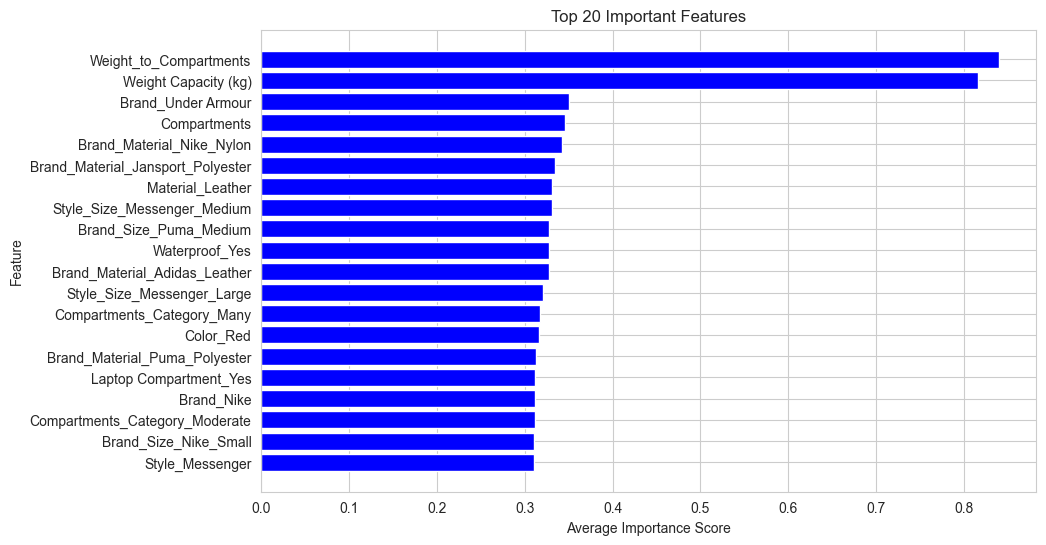

In [59]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(normalized_feature_importance['Feature'][:20], normalized_feature_importance['Average_Importance'][:20], color='blue')
plt.xlabel("Average Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Important Features")
plt.gca().invert_yaxis()
plt.show()

In [60]:
threshold = normalized_feature_importance['Average_Importance'].quantile(0.20)  # the importance where 20% of data is below
selected_features = normalized_feature_importance[normalized_feature_importance['Average_Importance'] > threshold]['Feature'].tolist()

In [61]:
selected_features

['Weight_to_Compartments',
 'Weight Capacity (kg)',
 'Brand_Under Armour',
 'Compartments',
 'Brand_Material_Nike_Nylon',
 'Brand_Material_Jansport_Polyester',
 'Material_Leather',
 'Style_Size_Messenger_Medium',
 'Brand_Size_Puma_Medium',
 'Waterproof_Yes',
 'Brand_Material_Adidas_Leather',
 'Style_Size_Messenger_Large',
 'Compartments_Category_Many',
 'Color_Red',
 'Brand_Material_Puma_Polyester',
 'Laptop Compartment_Yes',
 'Brand_Nike',
 'Compartments_Category_Moderate',
 'Brand_Size_Nike_Small',
 'Style_Messenger',
 'Size_Small',
 'Brand_Material_Under Armour_Leather',
 'Brand_Size_Nike_Medium',
 'Brand_Size_Jansport_Large',
 'Material_Nylon',
 'Brand_Puma',
 'Style_Size_Backpack_Medium',
 'Style_Size_Tote_Small',
 'Brand_Material_Nike_Canvas',
 'Brand_Size_Jansport_Small',
 'Brand_Size_Nike_Large',
 'Brand_Material_Under Armour_Polyester',
 'Brand_Jansport',
 'Style_Tote',
 'Brand_Size_Under Armour_Medium',
 'Brand_Size_Under Armour_Large',
 'Style_Size_Tote_Large',
 'Brand_Size_

Retrain using selected features

In [62]:
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
test_data_selected = test_data_combined[selected_features]

In [63]:
# Retrain models using selected features
xgb_model.fit(X_train_selected, Y_train)
lgb_model.fit(X_train_selected, Y_train)
rf_model.fit(X_train_selected, Y_train)

# Predict on validation set
val_preds_xgb = xgb_model.predict(X_val_selected)
val_preds_lgb = lgb_model.predict(X_val_selected)
val_preds_rf = rf_model.predict(X_val_selected)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 52
[LightGBM] [Info] Start training from score 81.448481


In [64]:
calculateMetrics(Y_val, val_preds_xgb,val_preds_lgb,val_preds_rf)

XGBoost Metrics:
MSE: 1519.5220, MAE: 33.6831, RMSE: 38.9810, R2: -0.0019
LightGBM Metrics:
MSE: 1525.1684, MAE: 33.7298, RMSE: 39.0534, R2: -0.0056
Random Forest Metrics:
MSE: 1639.9836, MAE: 34.5977, RMSE: 40.4967, R2: -0.0813


Optimize the weights of each model for the prediction

In [65]:
from scipy.optimize import minimize

# Function to optimize weights for weighted average ensemble
def loss(weights):
    weighted_preds = (weights[0] * val_preds_xgb +
                      weights[1] * val_preds_lgb +
                      weights[2] * val_preds_rf)
    return mean_absolute_error(Y_val, weighted_preds)

# Initial weights (equal distribution)
initial_weights = [0.33333, 0.33333, 0.33333]
constraints = ({'type': 'eq', 'fun': lambda w: 1 - sum(w)})
bounds = [(0, 1)] * 3

# Optimize weights
result = minimize(loss, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

In [66]:
optimal_weights = result.x


In [67]:
optimal_weights

array([6.96863707e-01, 3.03136293e-01, 2.77416659e-17])

--> Random forest model is obsolete ??

In [68]:
# Apply optimized weights for final predictions
val_preds = (optimal_weights[0] * val_preds_xgb +
             optimal_weights[1] * val_preds_lgb +
             optimal_weights[2] * val_preds_rf)

mae = mean_absolute_error(Y_val, val_preds)
print(f"Optimized Validation MAE: {mae}")
print(f"Optimal Weights: {optimal_weights}")

Optimized Validation MAE: 33.70322108169021
Optimal Weights: [6.96863707e-01 3.03136293e-01 2.77416659e-17]


In [69]:
# Predict on test set
test_preds_xgb = xgb_model.predict(test_data_selected)
test_preds_lgb = lgb_model.predict(test_data_selected)
test_preds_rf = rf_model.predict(test_data_selected)

# Apply optimized weights for test predictions
test_preds = (optimal_weights[0] * test_preds_xgb +
              optimal_weights[1] * test_preds_lgb +
              optimal_weights[2] * test_preds_rf)



In [70]:
# Create submission file
ensemble_submission_df = pd.DataFrame({
    'id': test_data_ids,
    'Price': test_preds
})

# Save submission file
ensemble_submission_df.to_csv('submission.csv', index=False)

# Display first 10 rows
ensemble_submission_df.head(10)

,id,Price
0,300000,80.721923
1,300001,80.278876
2,300002,83.011648
3,300003,80.891428
4,300004,78.631601
5,300005,84.375472
6,300006,82.084063
7,300007,83.134615
8,300008,84.462049
9,300009,83.594379
